In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
#csv files associated with Florida early voting data
provided_votes = "csv_files/provided.csv"
by_mail = "csv_files/bymail.csv"
voted_early = "csv_files/votedearly.csv"
quinnipiac_1 = "csv_files/quinnipiac1.csv"
quinnipiac_2 = "csv_files/quinnipiac2.csv"
florida_2016 = "csv_files/early-voting-2016.csv"

In [3]:
# Read CSV files
provided_df = pd.read_csv(provided_votes)
by_mail_df = pd.read_csv(by_mail)
voted_early_df = pd.read_csv(voted_early)
quinn1_df = pd.read_csv(quinnipiac_1)
quinn2_df = pd.read_csv(quinnipiac_2)
florida_early_2016 = pd.read_csv(florida_2016)

In [4]:
#Display " vote-by-mail provided" dataframe
provided_df.head()

,ElectionNumber,ElectionDate,ElectionName,CountyName,StatType,TotalRep,TotalDem,TotalOth,TotalNpa,GrandTotal,CompileDate
0,10866,11/3/2020,2020 General Election,State Totals,Vote-by-Mail Provided (Not Yet Returned),"474,860","642,113","24,851","389,411","1,531,235",10/31/2020 11:10AM
1,10866,11/3/2020,2020 General Election,Alachua,Vote-by-Mail Provided (Not Yet Returned),"3,899","9,494",254,"3,822","17,469",10/31/2020 8:35AM
2,10866,11/3/2020,2020 General Election,Baker,Vote-by-Mail Provided (Not Yet Returned),468,267,10,94,839,10/31/2020 8:35AM
3,10866,11/3/2020,2020 General Election,Bay,Vote-by-Mail Provided (Not Yet Returned),"4,422","3,142",194,"1,824","9,582",10/31/2020 8:35AM
4,10866,11/3/2020,2020 General Election,Bradford,Vote-by-Mail Provided (Not Yet Returned),596,449,18,159,"1,222",10/31/2020 8:35AM


In [5]:
#Display "voted vote-by-mail" dataframe
by_mail_df.head()

,ElectionNumber,ElectionDate,ElectionName,CountyName,StatType,TotalRep,TotalDem,TotalOth,TotalNpa,GrandTotal,CompileDate
0,10866,11/3/2020,2020 General Election,State Totals,Voted Vote-by-Mail,"1,397,810","2,041,734","58,165","973,580","4,471,289",10/31/2020 11:10AM
1,10866,11/3/2020,2020 General Election,Alachua,Voted Vote-by-Mail,"10,942","34,296",648,"10,030","55,916",10/31/2020 8:35AM
2,10866,11/3/2020,2020 General Election,Baker,Voted Vote-by-Mail,"1,398",874,19,188,"2,479",10/31/2020 8:35AM
3,10866,11/3/2020,2020 General Election,Bay,Voted Vote-by-Mail,"12,775","9,741",414,"4,181","27,111",10/31/2020 8:35AM
4,10866,11/3/2020,2020 General Election,Bradford,Voted Vote-by-Mail,"1,775","1,442",24,345,"3,586",10/31/2020 8:35AM


In [6]:
#Display "voted early" dataframe
voted_early_df.head()

,ElectionNumber,ElectionDate,ElectionName,CountyName,StatType,TotalRep,TotalDem,TotalOth,TotalNpa,GrandTotal,CompileDate
0,10866,11/3/2020,2020 General Election,State Totals,Voted Early,"1,766,751","1,235,905","54,095","772,006","3,828,757",10/31/2020 11:10AM
1,10866,11/3/2020,2020 General Election,Alachua,Voted Early,"16,290","24,569",737,"8,441","50,037",10/31/2020 8:35AM
2,10866,11/3/2020,2020 General Election,Baker,Voted Early,"4,757","1,198",48,509,"6,512",10/31/2020 8:35AM
3,10866,11/3/2020,2020 General Election,Bay,Voted Early,"28,820","8,070",600,"6,456","43,946",10/31/2020 8:35AM
4,10866,11/3/2020,2020 General Election,Bradford,Voted Early,"2,902","1,223",35,442,"4,602",10/31/2020 8:35AM


In [7]:
#Check Election Numbers to see if any different
voted_early_df["ElectionNumber"].value_counts()

10866    68
Name: ElectionNumber, dtype: int64

In [8]:
# Merge the DataFrames together based on what they share
merge_data_df = pd.merge(by_mail_df, voted_early_df, on="CountyName")
merge_data_df.head()

,ElectionNumber_x,ElectionDate_x,ElectionName_x,CountyName,StatType_x,TotalRep_x,TotalDem_x,TotalOth_x,TotalNpa_x,GrandTotal_x,...,ElectionNumber_y,ElectionDate_y,ElectionName_y,StatType_y,TotalRep_y,TotalDem_y,TotalOth_y,TotalNpa_y,GrandTotal_y,CompileDate_y
0,10866,11/3/2020,2020 General Election,State Totals,Voted Vote-by-Mail,"1,397,810","2,041,734","58,165","973,580","4,471,289",...,10866,11/3/2020,2020 General Election,Voted Early,"1,766,751","1,235,905","54,095","772,006","3,828,757",10/31/2020 11:10AM
1,10866,11/3/2020,2020 General Election,Alachua,Voted Vote-by-Mail,"10,942","34,296",648,"10,030","55,916",...,10866,11/3/2020,2020 General Election,Voted Early,"16,290","24,569",737,"8,441","50,037",10/31/2020 8:35AM
2,10866,11/3/2020,2020 General Election,Baker,Voted Vote-by-Mail,"1,398",874,19,188,"2,479",...,10866,11/3/2020,2020 General Election,Voted Early,"4,757","1,198",48,509,"6,512",10/31/2020 8:35AM
3,10866,11/3/2020,2020 General Election,Bay,Voted Vote-by-Mail,"12,775","9,741",414,"4,181","27,111",...,10866,11/3/2020,2020 General Election,Voted Early,"28,820","8,070",600,"6,456","43,946",10/31/2020 8:35AM
4,10866,11/3/2020,2020 General Election,Bradford,Voted Vote-by-Mail,"1,775","1,442",24,345,"3,586",...,10866,11/3/2020,2020 General Election,Voted Early,"2,902","1,223",35,442,"4,602",10/31/2020 8:35AM


In [9]:
# Drop columns of unimportance with drop method
merge_data_df.drop(['ElectionNumber_x', 'ElectionDate_x', 'ElectionName_x', 'ElectionNumber_y', 'ElectionDate_y', 'ElectionName_y'], axis=1, inplace=True)

merge_data_df

,CountyName,StatType_x,TotalRep_x,TotalDem_x,TotalOth_x,TotalNpa_x,GrandTotal_x,CompileDate_x,StatType_y,TotalRep_y,TotalDem_y,TotalOth_y,TotalNpa_y,GrandTotal_y,CompileDate_y
0,State Totals,Voted Vote-by-Mail,"1,397,810","2,041,734","58,165","973,580","4,471,289",10/31/2020 11:10AM,Voted Early,"1,766,751","1,235,905","54,095","772,006","3,828,757",10/31/2020 11:10AM
1,Alachua,Voted Vote-by-Mail,"10,942","34,296",648,"10,030","55,916",10/31/2020 8:35AM,Voted Early,"16,290","24,569",737,"8,441","50,037",10/31/2020 8:35AM
2,Baker,Voted Vote-by-Mail,"1,398",874,19,188,"2,479",10/31/2020 8:35AM,Voted Early,"4,757","1,198",48,509,"6,512",10/31/2020 8:35AM
3,Bay,Voted Vote-by-Mail,"12,775","9,741",414,"4,181","27,111",10/31/2020 8:35AM,Voted Early,"28,820","8,070",600,"6,456","43,946",10/31/2020 8:35AM
4,Bradford,Voted Vote-by-Mail,"1,775","1,442",24,345,"3,586",10/31/2020 8:35AM,Voted Early,"2,902","1,223",35,442,"4,602",10/31/2020 8:35AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Union,Voted Vote-by-Mail,523,457,13,65,"1,058",10/31/2020 8:35AM,Voted Early,"1,883",717,20,186,"2,806",10/31/2020 8:35AM
64,Volusia,Voted Vote-by-Mail,"46,047","55,808","1,974","30,100","133,929",10/31/2020 8:35AM,Voted Early,"47,692","27,601","1,491","21,320","98,104",10/31/2020 8:35AM
65,Wakulla,Voted Vote-by-Mail,"1,773","2,344",49,588,"4,754",10/31/2020 8:35AM,Voted Early,"4,763","2,242",98,"1,044","8,147",10/31/2020 8:35AM
66,Walton,Voted Vote-by-Mail,"5,713","3,248",197,"1,720","10,878",10/31/2020 8:35AM,Voted Early,"13,719","2,447",302,"2,707","19,175",10/31/2020 8:35AM


In [10]:
# Using .rename(columns={}) in order to rename columns
renamed_df = merge_data_df.rename(columns={"CountyName":"County Name", "StatType_x":"Stat Type By Mail", "TotalRep_x":"Total Republicans By Mail", "TotalDem_x":"Total Democrats By Mail",
                                     "TotalOth_x":"Total Minors By Mail", "TotalNpa_x":"Total No Party Affiliation By Mail", "GrandTotal_x":"Grand Total By Mail", "CompileDate_x":"Compile Date By Mail", 
                                     "StatType_y":"Stat Type Voted Early", "TotalRep_y":"Total Republicans Voted Early", "TotalDem_y":"Total Democrats Voted Early",  "TotalOth_y":"Total Minors Voted Early", 
                                     "TotalNpa_y":"Total No Party Affiliation Voted Early", "GrandTotal_y":"Grand Total Voted Early", "CompileDate_y":"Compile Date Voted Early"})
renamed_df.head()

,County Name,Stat Type By Mail,Total Republicans By Mail,Total Democrats By Mail,Total Minors By Mail,Total No Party Affiliation By Mail,Grand Total By Mail,Compile Date By Mail,Stat Type Voted Early,Total Republicans Voted Early,Total Democrats Voted Early,Total Minors Voted Early,Total No Party Affiliation Voted Early,Grand Total Voted Early,Compile Date Voted Early
0,State Totals,Voted Vote-by-Mail,"1,397,810","2,041,734","58,165","973,580","4,471,289",10/31/2020 11:10AM,Voted Early,"1,766,751","1,235,905","54,095","772,006","3,828,757",10/31/2020 11:10AM
1,Alachua,Voted Vote-by-Mail,"10,942","34,296",648,"10,030","55,916",10/31/2020 8:35AM,Voted Early,"16,290","24,569",737,"8,441","50,037",10/31/2020 8:35AM
2,Baker,Voted Vote-by-Mail,"1,398",874,19,188,"2,479",10/31/2020 8:35AM,Voted Early,"4,757","1,198",48,509,"6,512",10/31/2020 8:35AM
3,Bay,Voted Vote-by-Mail,"12,775","9,741",414,"4,181","27,111",10/31/2020 8:35AM,Voted Early,"28,820","8,070",600,"6,456","43,946",10/31/2020 8:35AM
4,Bradford,Voted Vote-by-Mail,"1,775","1,442",24,345,"3,586",10/31/2020 8:35AM,Voted Early,"2,902","1,223",35,442,"4,602",10/31/2020 8:35AM


In [11]:
#Check datatypes
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   County Name                             68 non-null     object
 1   Stat Type By Mail                       68 non-null     object
 2   Total Republicans By Mail               68 non-null     object
 3   Total Democrats By Mail                 68 non-null     object
 4   Total Minors By Mail                    68 non-null     object
 5   Total No Party Affiliation By Mail      68 non-null     object
 6   Grand Total By Mail                     68 non-null     object
 7   Compile Date By Mail                    68 non-null     object
 8   Stat Type Voted Early                   68 non-null     object
 9   Total Republicans Voted Early           68 non-null     object
 10  Total Democrats Voted Early             68 non-null     object
 11  Total Mi

In [12]:
#Get rid of commas in each of the needed Columns
Columns = ['Total Republicans By Mail', 'Total Democrats By Mail', 'Total Minors By Mail', 'Total No Party Affiliation By Mail',
          'Grand Total By Mail', 'Total Republicans Voted Early', 'Total Democrats Voted Early', 'Total Minors Voted Early',
          'Total No Party Affiliation Voted Early', 'Grand Total Voted Early']

for i in Columns:
    
    renamed_df[i]=renamed_df[i].str.replace(',','')

In [13]:
#Display without commas in needed Columns
renamed_df.head()

,County Name,Stat Type By Mail,Total Republicans By Mail,Total Democrats By Mail,Total Minors By Mail,Total No Party Affiliation By Mail,Grand Total By Mail,Compile Date By Mail,Stat Type Voted Early,Total Republicans Voted Early,Total Democrats Voted Early,Total Minors Voted Early,Total No Party Affiliation Voted Early,Grand Total Voted Early,Compile Date Voted Early
0,State Totals,Voted Vote-by-Mail,1397810,2041734,58165,973580,4471289,10/31/2020 11:10AM,Voted Early,1766751,1235905,54095,772006,3828757,10/31/2020 11:10AM
1,Alachua,Voted Vote-by-Mail,10942,34296,648,10030,55916,10/31/2020 8:35AM,Voted Early,16290,24569,737,8441,50037,10/31/2020 8:35AM
2,Baker,Voted Vote-by-Mail,1398,874,19,188,2479,10/31/2020 8:35AM,Voted Early,4757,1198,48,509,6512,10/31/2020 8:35AM
3,Bay,Voted Vote-by-Mail,12775,9741,414,4181,27111,10/31/2020 8:35AM,Voted Early,28820,8070,600,6456,43946,10/31/2020 8:35AM
4,Bradford,Voted Vote-by-Mail,1775,1442,24,345,3586,10/31/2020 8:35AM,Voted Early,2902,1223,35,442,4602,10/31/2020 8:35AM


In [14]:
#Change all objects to numeric
Columns = ['Total Republicans By Mail', 'Total Democrats By Mail', 'Total Minors By Mail', 'Total No Party Affiliation By Mail',
          'Grand Total By Mail', 'Total Republicans Voted Early', 'Total Democrats Voted Early', 'Total Minors Voted Early',
          'Total No Party Affiliation Voted Early', 'Grand Total Voted Early']

renamed_df[Columns] = renamed_df[Columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [15]:
#Recheck datatypes
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   County Name                             68 non-null     object
 1   Stat Type By Mail                       68 non-null     object
 2   Total Republicans By Mail               68 non-null     int64 
 3   Total Democrats By Mail                 68 non-null     int64 
 4   Total Minors By Mail                    68 non-null     int64 
 5   Total No Party Affiliation By Mail      68 non-null     int64 
 6   Grand Total By Mail                     68 non-null     int64 
 7   Compile Date By Mail                    68 non-null     object
 8   Stat Type Voted Early                   68 non-null     object
 9   Total Republicans Voted Early           68 non-null     int64 
 10  Total Democrats Voted Early             68 non-null     int64 
 11  Total Mi

In [16]:
#Drop "State Totals" row by row index
renamed_df = renamed_df.drop(renamed_df.index[0])
renamed_df

,County Name,Stat Type By Mail,Total Republicans By Mail,Total Democrats By Mail,Total Minors By Mail,Total No Party Affiliation By Mail,Grand Total By Mail,Compile Date By Mail,Stat Type Voted Early,Total Republicans Voted Early,Total Democrats Voted Early,Total Minors Voted Early,Total No Party Affiliation Voted Early,Grand Total Voted Early,Compile Date Voted Early
1,Alachua,Voted Vote-by-Mail,10942,34296,648,10030,55916,10/31/2020 8:35AM,Voted Early,16290,24569,737,8441,50037,10/31/2020 8:35AM
2,Baker,Voted Vote-by-Mail,1398,874,19,188,2479,10/31/2020 8:35AM,Voted Early,4757,1198,48,509,6512,10/31/2020 8:35AM
3,Bay,Voted Vote-by-Mail,12775,9741,414,4181,27111,10/31/2020 8:35AM,Voted Early,28820,8070,600,6456,43946,10/31/2020 8:35AM
4,Bradford,Voted Vote-by-Mail,1775,1442,24,345,3586,10/31/2020 8:35AM,Voted Early,2902,1223,35,442,4602,10/31/2020 8:35AM
5,Brevard,Voted Vote-by-Mail,50683,56047,2266,27662,136658,10/31/2020 8:35AM,Voted Early,69435,34624,2409,26474,132942,10/31/2020 8:35AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Union,Voted Vote-by-Mail,523,457,13,65,1058,10/31/2020 8:35AM,Voted Early,1883,717,20,186,2806,10/31/2020 8:35AM
64,Volusia,Voted Vote-by-Mail,46047,55808,1974,30100,133929,10/31/2020 8:35AM,Voted Early,47692,27601,1491,21320,98104,10/31/2020 8:35AM
65,Wakulla,Voted Vote-by-Mail,1773,2344,49,588,4754,10/31/2020 8:35AM,Voted Early,4763,2242,98,1044,8147,10/31/2020 8:35AM
66,Walton,Voted Vote-by-Mail,5713,3248,197,1720,10878,10/31/2020 8:35AM,Voted Early,13719,2447,302,2707,19175,10/31/2020 8:35AM


In [17]:
#By Mail Votes Count 
#Number of "Grand Total By Mail"
total_count_mailed = renamed_df["Grand Total By Mail"].sum()

#Number of "Total Republicans By Mail"
republican_count_mailed = renamed_df["Total Republicans By Mail"].sum()

#Number of "Total Democrats By Mail"
democrat_count_mailed = renamed_df["Total Democrats By Mail"].sum()

#Number of "Total Minors By Mail"
minor_count_mailed = renamed_df["Total Minors By Mail"].sum()

#Number of "Total No Party Affiliation By Mail"
npa_count_mailed = renamed_df["Total No Party Affiliation By Mail"].sum()

#Create a summary data frame to hold the results
mailed_summary = pd.DataFrame([{"Number of Total Republicans Voted Early": republican_count_mailed,
                                 "Number of Total Democrats Voted Early": democrat_count_mailed,
                                 "Number of Total Minors Voted Early": minor_count_mailed,
                                 "Number of Total No Party Affiliation Voted Early": npa_count_mailed}], index = ["Total Votes"])

#Display the summary data 
mailed_summary

,Number of Total Republicans Voted Early,Number of Total Democrats Voted Early,Number of Total Minors Voted Early,Number of Total No Party Affiliation Voted Early
Total Votes,1397810,2041734,58165,973580


In [18]:
#Early Votes Count 
#Number of "Grand Total Voted Early"
total_count_early = renamed_df["Grand Total Voted Early"].sum()

#Number of "Total Republicans Voted Early"
republican_count_early = renamed_df["Total Republicans Voted Early"].sum()

#Number of "Total Democrats Voted Early"
democrat_count_early = renamed_df["Total Democrats Voted Early"].sum()

#Number of "Total Minors Voted Early"
minor_count_early = renamed_df["Total Minors Voted Early"].sum()

#Number of "Total No Party Affiliation Provided Voted Early"
npa_count_early = renamed_df["Total No Party Affiliation Voted Early"].sum()

#Create a summary data frame to hold the results
early_summary = pd.DataFrame([{"Number of Total Republicans Voted Early": republican_count_early,
                                 "Number of Total Democrats Voted Early": democrat_count_early,
                                 "Number of Total Minors Voted Early": minor_count_early,
                                 "Number of Total No Party Affiliation Voted Early": npa_count_early}], index = ["Total Votes"])

#Display the summary data 
early_summary

,Number of Total Republicans Voted Early,Number of Total Democrats Voted Early,Number of Total Minors Voted Early,Number of Total No Party Affiliation Voted Early
Total Votes,1766751,1235905,54095,772006


In [19]:
#Total Votes Count for Mail-In and Voted Early
#Number of "Grand Total Voted Early"
total_count = total_count_mailed + total_count_early

#Number of "Total Republicans Voted Early"
republican_count = republican_count_mailed + republican_count_early

#Number of "Total Democrats Voted Early"
democrat_count = democrat_count_mailed + democrat_count_early

#Number of "Total Minors Voted Early"
minor_count = minor_count_mailed + minor_count_early

#Number of "Total No Party Affiliation Provided Voted Early"
npa_count = npa_count_mailed + npa_count_early

#Create a summary data frame to hold the results
totals_summary = pd.DataFrame([{"Number of Total Republicans Voted": republican_count,
                                 "Number of Total Democrats Voted": democrat_count,
                                 "Number of Total Minors Voted": minor_count,
                                 "Number of Total No Party Affiliation Voted": npa_count}], index = ["Total Votes"])

#Display the summary data 
totals_summary

,Number of Total Republicans Voted,Number of Total Democrats Voted,Number of Total Minors Voted,Number of Total No Party Affiliation Voted
Total Votes,3164561,3277639,112260,1745586


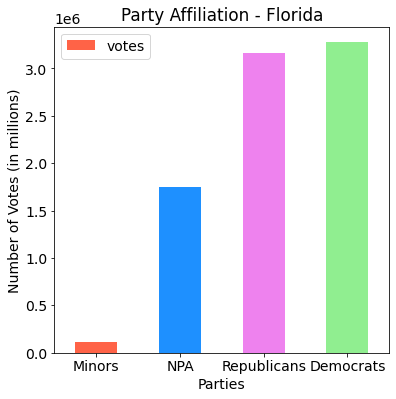

In [47]:
# Use DataFrame.plot() in order to create a bar chart of the data
color = ["tomato", "dodgerblue", "violet", "lightgreen"]

totals_summary = pd.DataFrame({'Parties':['Minors', 'NPA', 'Republicans', 'Democrats'], 
                               'votes':[112260, 1745586, 3164561, 3277639]})
totals_summary.plot.bar(x='Parties', y='votes', rot=0, figsize=(6,6), color=color)
plt.rcParams['font.size'] = 14

# Set a title for the chart
plt.title("Party Affiliation - Florida")

# Set labels for the chart
plt.xlabel("Parties")
plt.ylabel("Number of Votes (in millions)")

#Save as png
plt.savefig("Party Affiliation Early Voting in Florida.png")

# Show the graph
plt.show()

In [21]:
#Calculate Percent "Total Republicans Voted Early"
percent_republican_count = republican_count / total_count

#Calculate Percent "Total Democrats Voted Early"
percent_democrat_count = democrat_count / total_count

#Calculate Percent "Total Minors Voted Early"
percent_minor_count = minor_count /total_count

#Calculate Percent "Total No Party Affiliation Provided Voted Early"
percent_npa_count = npa_count / total_count

#Create a summary data frame to hold the results
percentage_summary = pd.DataFrame([{"Percentage of Republicans Voted": percent_republican_count,
                                 "Percentage of Democrats Voted": percent_democrat_count,
                                 "Percentage of Minors Voted": percent_minor_count,
                                 "Percentage of No Party Affiliation Voted": percent_npa_count}], index = ["Percentages"])
                            
#Display Dataframe
percentage_summary

,Percentage of Republicans Voted,Percentage of Democrats Voted,Percentage of Minors Voted,Percentage of No Party Affiliation Voted
Percentages,0.38127,0.394894,0.013525,0.21031


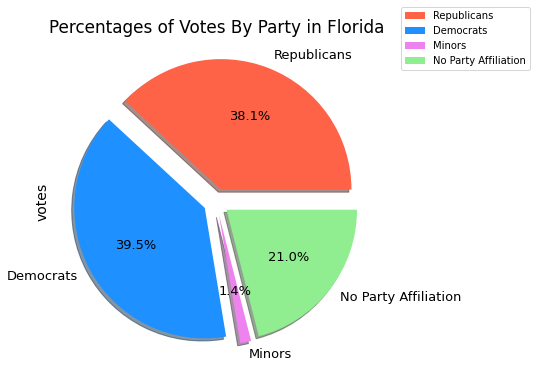

In [46]:
#Make a pie chart to show the percentage totals of various parties that early voted in Florida
# The colors of each section of the pie chart
colors = ["tomato", "dodgerblue", "violet", "lightgreen"]

# Explode out the pie pieces 
explode = (0.1, 0.1, 0.1, 0.1)

percentage_summary = pd.DataFrame({'votes': [0.38127, 0.394894, 0.013525, 0.21031]},
                  index=['Republicans', 'Democrats', 'Minors', 'No Party Affiliation'])
plot = percentage_summary.plot.pie(y='votes', figsize=(6, 6), autopct="%1.1f%%", colors=colors, fontsize=13, explode=explode, shadow=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="center left", fontsize=10)
plt.rcParams['font.size'] = 14

# Set a title for the chart
plt.title("Percentages of Votes By Party in Florida")

#Save as png
plt.savefig("Percentages of Votes By Party Early Voting in Florida.png")

#Show the graph
plt.show()

In [23]:
#Display Quinnipiac dataframe
quinn1_df

,Unnamed: 0,Total,Republican,Democrat,Independent,Men,Women,Yes,No
0,Biden,47,7,91,50,39,55,50,35
1,Trump,42,90,3,34,50,35,43,55


In [24]:
# Using .rename(columns={}) in order to rename columns
renamed_quinn1_df = quinn1_df.rename(columns={"Unnamed: 0":"Candidate", "Total":"Total", "Republican":"Republican", "Democrat":"Democrat",
                                              "Independent":"Independent", "Men":"Men", "Women":"Women","Yes":"Yes","No":"No"})
renamed_quinn1_df

,Candidate,Total,Republican,Democrat,Independent,Men,Women,Yes,No
0,Biden,47,7,91,50,39,55,50,35
1,Trump,42,90,3,34,50,35,43,55


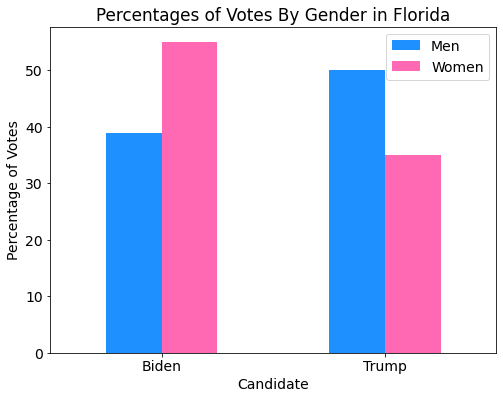

In [48]:
#Graph data from Quinnipiac 1 on Gender
color = ["dodgerblue", "hotpink"]
Male = [39, 50]
Female = [55, 35]
index = ['Biden', 'Trump']
gender_df = pd.DataFrame({'Men': Male,
                   'Women': Female}, index=index)
ax = gender_df.plot.bar(color=color, rot=0, figsize=(8,6))
plt.rcParams['font.size'] = 14

# Set a title for the chart
plt.title("Percentages of Votes By Gender in Florida")

# Set labels for the chart
plt.xlabel("Candidate")
plt.ylabel("Percentage of Votes")

#Legend and its location
plt.legend(loc='best')

#Save as png
plt.savefig("Percentages of Votes By Gender Early Voting in Florida.png")

#Show the graph
plt.show()

In [26]:
#Display Quinnipiac 2 dataframe
quinn2_df

,Unnamed: 0,Ages,Unnamed: 2,Unnamed: 3,Unnamed: 4,White,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,18-34,35-49,50-64,65+,Men,Women,White,Black,Hispanic
1,Biden,51,46,45,49,31,48,41,85,47
2,Trump,38,41,48,42,59,44,51,4,43
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Drop the columns where all the elements are NaN
quinn2_cleaned = quinn2_df.dropna(axis='rows', how='all')
quinn2_cleaned

,Unnamed: 0,Ages,Unnamed: 2,Unnamed: 3,Unnamed: 4,White,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,18-34,35-49,50-64,65+,Men,Women,White,Black,Hispanic
1,Biden,51,46,45,49,31,48,41,85,47
2,Trump,38,41,48,42,59,44,51,4,43


In [28]:
# Using .rename(columns={}) in order to rename columns
renamed_quinn2_df = quinn2_cleaned.rename(columns={'Unnamed: 0': 'Candidate', 'Ages': '18-34', 'Unnamed: 2': '35-49', 'Unnamed: 3': '50-64', 'Unnamed: 4':'65+', 'White': 'Men', 
                                                   'Unnamed: 6': 'Women', 'Unnamed: 7': 'White', 'Unnamed: 8': 'Black', 'Unnamed: 9': 'Hispanic'})
renamed_quinn2_df

,Candidate,18-34,35-49,50-64,65+,White,Women,White,Black,Hispanic
0,NaN,18-34,35-49,50-64,65+,Men,Women,White,Black,Hispanic
1,Biden,51,46,45,49,31,48,41,85,47
2,Trump,38,41,48,42,59,44,51,4,43


In [29]:
#Drop "0" row by row index
drop_quinn2_df = renamed_quinn2_df.drop([0])
drop_quinn2_df

,Candidate,18-34,35-49,50-64,65+,White,Women,White,Black,Hispanic
1,Biden,51,46,45,49,31,48,41,85,47
2,Trump,38,41,48,42,59,44,51,4,43


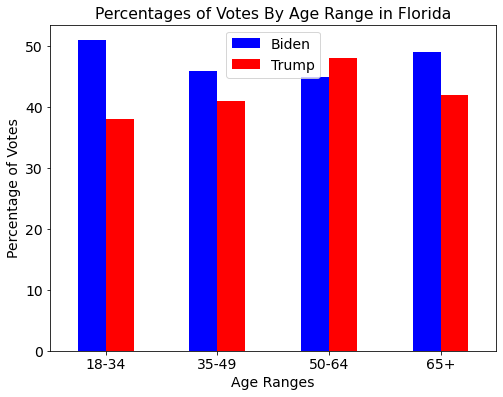

In [49]:
#Graph data from Quinnipiac 2 on Ages
color = ["blue", "red"]
Biden = [51, 46, 45, 49]
Trump = [38, 41, 48, 42]
index = ['18-34', '35-49', '50-64', '65+']
ages_df = pd.DataFrame({"Biden": Biden,
                   "Trump": Trump}, index=index)
ax = ages_df.plot.bar(color=color, rot=0,figsize=(8,6))
ax.legend(loc='upper center')
plt.rcParams['font.size'] = 13

# Set a title for the chart
plt.title("Percentages of Votes By Age Range in Florida")

# Set labels for the chart
plt.xlabel("Age Ranges")
plt.ylabel("Percentage of Votes")

#Save as png
plt.savefig("Percentages of Votes By Age Early Voting in Florida.png")

#Show the graph
plt.show()

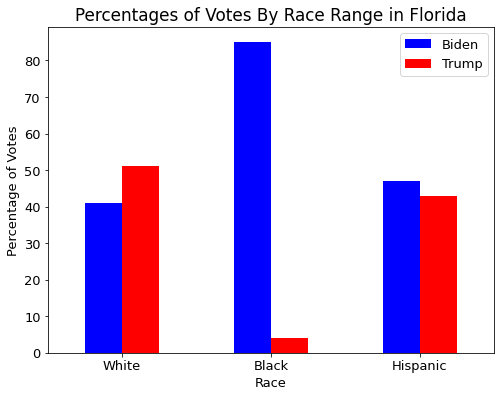

In [50]:
#Graph data from Quinnipiac 2 on Race
color = ["blue", "red"]
Biden = [41, 85, 47]
Trump = [51, 4, 43]
index = ["White", "Black", "Hispanic"]
race_df = pd.DataFrame({"Biden": Biden,
                        "Trump": Trump}, index=index)
ax = race_df.plot.bar(color=color, rot=0, figsize=(8,6))
ax.legend(loc='best')
plt.rcParams['font.size'] = 14

# Set a title for the chart
plt.title("Percentages of Votes By Race Range in Florida")

# Set labels for the chart
plt.xlabel("Race")
plt.ylabel("Percentage of Votes")

#Save as png
plt.savefig("Percentages of Votes By Race Early Voting in Florida.png")

#Show the graph
plt.show()

In [32]:
#Display "Florida 2016" dataframe
florida_early_2016.head()

,STATE TOTAL,Republican,Democrat,Other,Affiliation,TOTAL
0,Vote-by-Mail Provided (Not Yet Returned),"201,144","265,120","14,089","135,532","615,885"
1,Voted Vote-by-Mail,"1,108,053","1,049,809","69,318","504,895","2,732,075"
2,Voted Early,"1,425,309","1,580,003","89,990","779,627","3,874,929"


In [33]:
#Get rid of commas in each of the needed Columns
Columns = ['Republican', 'Democrat', 'Other', 'Affiliation','TOTAL']

for i in Columns:
    florida_early_2016[i]=florida_early_2016[i].str.replace(',','')

In [34]:
#Drop "Vote-by-Mail Provided (Not Yet Returned)" row by row index
florida_early_2016 = florida_early_2016.drop(florida_early_2016.index[0])
florida_early_2016

,STATE TOTAL,Republican,Democrat,Other,Affiliation,TOTAL
1,Voted Vote-by-Mail,1108053,1049809,69318,504895,2732075
2,Voted Early,1425309,1580003,89990,779627,3874929


In [35]:
# Drop columns of unimportance with drop method
florida_early_2016.drop(['STATE TOTAL'], axis=1, inplace=True)

florida_early_2016

,Republican,Democrat,Other,Affiliation,TOTAL
1,1108053,1049809,69318,504895,2732075
2,1425309,1580003,89990,779627,3874929


In [36]:
# Rename index
florida_rename = florida_early_2016.rename(index={1: 'Voted Vote-by-Mail', 2: 'Voted Early'})
florida_rename

,Republican,Democrat,Other,Affiliation,TOTAL
Voted Vote-by-Mail,1108053,1049809,69318,504895,2732075
Voted Early,1425309,1580003,89990,779627,3874929


In [37]:
#Check datatypes
florida_rename.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Voted Vote-by-Mail to Voted Early
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Republican   2 non-null      object
 1   Democrat     2 non-null      object
 2   Other        2 non-null      object
 3   Affiliation  2 non-null      object
 4   TOTAL        2 non-null      object
dtypes: object(5)
memory usage: 96.0+ bytes


In [38]:
#Display without commas in needed Columns
florida_rename.head()

,Republican,Democrat,Other,Affiliation,TOTAL
Voted Vote-by-Mail,1108053,1049809,69318,504895,2732075
Voted Early,1425309,1580003,89990,779627,3874929


In [39]:
#Change all objects to numeric
Columns = ['Republican', 'Democrat', 'Other', 'Affiliation','TOTAL']

florida_rename[Columns] = florida_rename[Columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [40]:
#Recheck datatypes
florida_rename.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Voted Vote-by-Mail to Voted Early
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Republican   2 non-null      int64
 1   Democrat     2 non-null      int64
 2   Other        2 non-null      int64
 3   Affiliation  2 non-null      int64
 4   TOTAL        2 non-null      int64
dtypes: int64(5)
memory usage: 96.0+ bytes


In [41]:
#Early Voting 2016 Count 
#Number of "Total Early Votes in 2016"
total_count_2016 = florida_rename["TOTAL"].sum()

#Number of "Total Republicans Early Votes in 2016"
republican_count_2016 = florida_rename["Republican"].sum()

#Number of "Total Democrats Early Votes in 2016"
democrat_count_2016 = florida_rename["Democrat"].sum()

#Number of "Total Other Early Votes in 2016"
other_count_2016 = florida_rename["Other"].sum()

#Number of "Total No Party Affiliation Early Votes in 2016"
npa_count_2016 = florida_rename["Affiliation"].sum()

#Create a summary data frame to hold the results
prior_election_summary = pd.DataFrame([{"Number of Total Republicans Voted Early 2016": republican_count_2016,
                                 "Number of Total Democrats Voted Early 2016": democrat_count_2016,
                                 "Number of Total Other Voted Early 2016": other_count_2016,
                                 "Number of Total No Party Affiliation Voted Early 2016": npa_count_2016}], index = ["Total Votes"])

#Display the summary data 
prior_election_summary

,Number of Total Republicans Voted Early 2016,Number of Total Democrats Voted Early 2016,Number of Total Other Voted Early 2016,Number of Total No Party Affiliation Voted Early 2016
Total Votes,2533362,2629812,159308,1284522


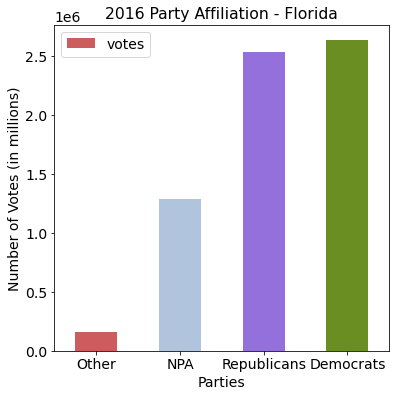

In [51]:
# Use DataFrame.plot() in order to create a bar chart of the data from 2016
color = ["indianred", "lightsteelblue", "mediumpurple", "olivedrab"]

totals_summary2016 = pd.DataFrame({'Parties':['Other', 'NPA', 'Republicans', 'Democrats'], 
                               'votes':[159308, 1284522, 2533362, 2629812]})
totals_summary2016.plot.bar(x='Parties', y='votes', rot=0, figsize=(6,6), color=color)
plt.rcParams['font.size'] = 13

# Set a title for the chart
plt.title("2016 Party Affiliation - Florida")

# Set labels for the chart
plt.xlabel("Parties")
plt.ylabel("Number of Votes (in millions)")

#Save as png
plt.savefig("Number of Votes By Party Early Voting in Florida 2016.png")

# Show the graph
plt.show()

In [43]:
#Calculate Percent "Total Republicans Early Votes in 2016"
percent_republican_count2016 = republican_count_2016 / total_count_2016

#Calculate Percent "Total Democrats Early Votes in 2016"
percent_democrat_count2016 = democrat_count_2016 / total_count_2016

#Calculate Percent "Total Other Early Votes in 2016"
percent_other_count2016 = other_count_2016 /total_count_2016

#Calculate Percent "Total No Party Affiliation Early Votes in 2016"
percent_npa_count2016 = npa_count_2016 / total_count_2016

#Create a summary data frame to hold the results
percentage_summary2 = pd.DataFrame([{"Percentage of Republicans Voted 2016": percent_republican_count2016,
                                 "Percentage of Democrats Voted 2016": percent_democrat_count2016,
                                 "Percentage of Other Voted 2016": percent_other_count2016,
                                 "Percentage of No Party Affiliation Voted": percent_npa_count2016}], index = ["Percentages"])
                            
#Display Dataframe
percentage_summary2

,Percentage of Republicans Voted 2016,Percentage of Democrats Voted 2016,Percentage of Other Voted 2016,Percentage of No Party Affiliation Voted
Percentages,0.383436,0.398034,0.024112,0.194418


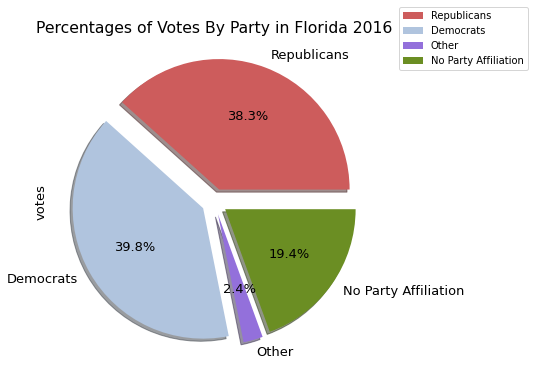

In [52]:
#Make a pie chart to show the percentage totals of various parties that early voted in Florida in 2016
# The colors of each section of the pie chart
colors = ["indianred", "lightsteelblue", "mediumpurple", "olivedrab"]

# Explode out the pie pieces 
explode = (0.1, 0.1, 0.1, 0.1)

percentage_summary2 = pd.DataFrame({'votes': [0.383436, 0.398034, 0.024112, 0.194418]},
                  index=['Republicans', 'Democrats', 'Other', 'No Party Affiliation'])
plot = percentage_summary2.plot.pie(y='votes', figsize=(6, 6), autopct="%1.1f%%", colors=colors, explode=explode, shadow=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="center left", fontsize=10)
plt.rcParams['font.size'] = 13

# Set a title for the chart
plt.title("Percentages of Votes By Party in Florida 2016")

#Save as png
plt.savefig("Percentages of Votes By Party Early Voting in Florida 2016.png")

#Show the graph
plt.show()